## **Diabetic Retinopathy Detection: A Hybrid Intelligent Approach**

Diabetic retinopathy (DR) is a significant health concern that can threaten human vision; it can cause vision impairment and vision loss.

We utilize the APTOS dataset in Kaggle, which consists of 3662 training and 1928 testing images.

The model classifies fundus images into

0 - No_DR    
1 - DR

Dataset Link : https://www.kaggle.com/competitions/aptos2019-blindness-detection

### **Import the Libraries**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import random
import cv2
import skimage
from PIL import Image
from skimage import exposure
from sklearn.model_selection import train_test_split
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.preprocessing import image
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.decomposition import PCA

2024-04-27 04:02:53.292357: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 04:02:53.292468: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-27 04:02:53.390340: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### **Connect and Read the Data**


In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
# Adjusting the paths to read the CSV file and images
csv_path = '/kaggle/input/aptos2019-blindness-detection/train.csv'
trainpath = '/kaggle/input/aptos2019-blindness-detection/train_images'

# Read the CSV file
train_csv = pd.read_csv(csv_path)

## **Image Preprocessing**

In [ ]:
# Check if GPU is available
if tf.config.experimental.list_physical_devices('GPU'):
    print('GPU available')
else:
    print('GPU not available, switching to CPU')

TrainImages = []
TrainLabels = []

train_csv = pd.read_csv(csv_path)

for index, row in train_csv.iterrows():
    if pd.isna(row['id_code']) or pd.isna(row['diagnosis']):
        print(f"Warning: Found NaN value in 'id_code' or 'label'. Skipping...")
        continue

    image_filename = str(row['id_code']).strip() + '.png'
    image_path = os.path.join(trainpath, image_filename)

    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Unable to read image '{image_path}'. Skipping...")
        continue

    try:
        img = cv2.resize(img, (1400, 1000), interpolation=cv2.INTER_AREA)
        print(img.shape)
    except Exception as e:
        print(f"Error resizing image: {e}. Skipping...")
        continue

    height, width, layers = img.shape
    size = (width, height)
    #print(size)

    resized_image = cv2.resize(img, (224, 224))

    # Apply CLAHE to enhance local contrast
    lab_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2LAB)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    lab_image[:, :, 0] = clahe.apply(lab_image[:, :, 0])
    final_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR)

    # Stack the final image to create a 3-channel image
    processed_image = final_image

    # Convert labels to binary format
    if row['diagnosis'] == 0:
        TrainLabels.append(0)
    else:
        TrainLabels.append(1)


    TrainImages.append(processed_image)

TrainImages = np.array(TrainImages)
TrainLabels = np.array(TrainLabels)


GPU available
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 1400, 3)
(1000, 140

## **Labels Distribution ( Data Profiling )**
This is the label distribution before applying the new categories

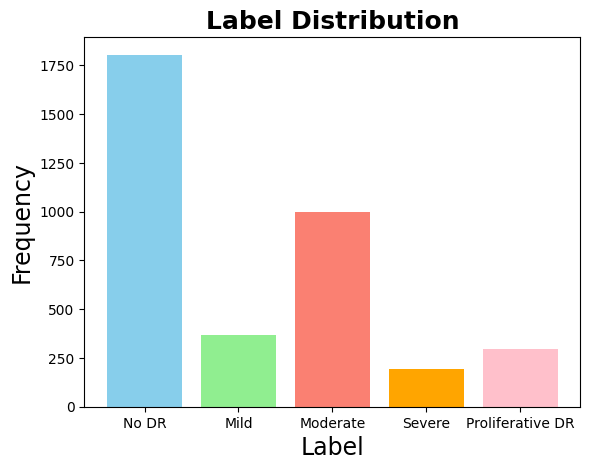

In [ ]:
label_distribution = train_csv['diagnosis']
unique_labels, label_counts = np.unique(label_distribution, return_counts=True)
colors = ['skyblue', 'lightgreen', 'salmon', 'orange','pink']
plt.bar(unique_labels, label_counts, color=colors)
plt.title("Label Distribution", weight='bold', fontsize=18)
plt.xlabel("Label", fontsize=17)
plt.ylabel("Frequency", fontsize=17)
plt.xticks(unique_labels, ['No DR','Mild', 'Moderate', 'Severe','Proliferative DR'])
plt.show()

This is the label distribution after applying the new categories

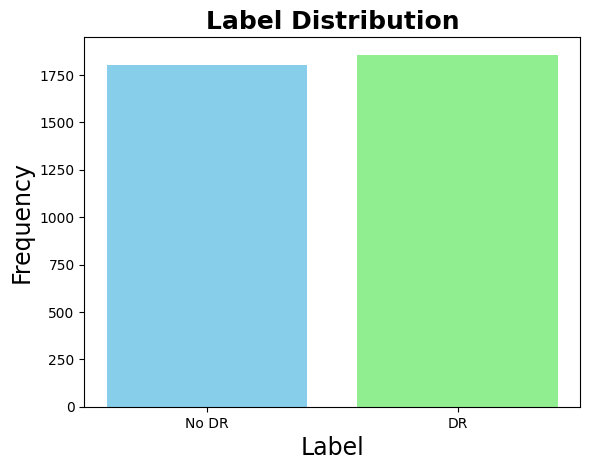

In [ ]:
label_distribution = TrainLabels
unique_labels, label_counts = np.unique(label_distribution, return_counts=True)
colors = ['skyblue', 'lightgreen']
plt.bar(unique_labels, label_counts, color=colors)
plt.title("Label Distribution", weight='bold', fontsize=18)
plt.xlabel("Label", fontsize=17)
plt.ylabel("Frequency", fontsize=17)
plt.xticks(unique_labels, ['No DR','DR'])
plt.show()

### **Value Counts in for the original multi dataset**

In [ ]:
# Display value counts in a specific column ('col1')
value_counts = train_csv['diagnosis'].value_counts()

# Print the value counts
print(value_counts)

diagnosis
0    1805
2     999
1     370
4     295
3     193
Name: count, dtype: int64


### **Value Counts after converting to binary dataset**

In [ ]:
from collections import Counter

# Create a Counter object to count element occurrences
value_counts = Counter(TrainLabels)

# Print the value counts
print(value_counts)


Counter({1: 1857, 0: 1805})


### **Display images after preprocessing**


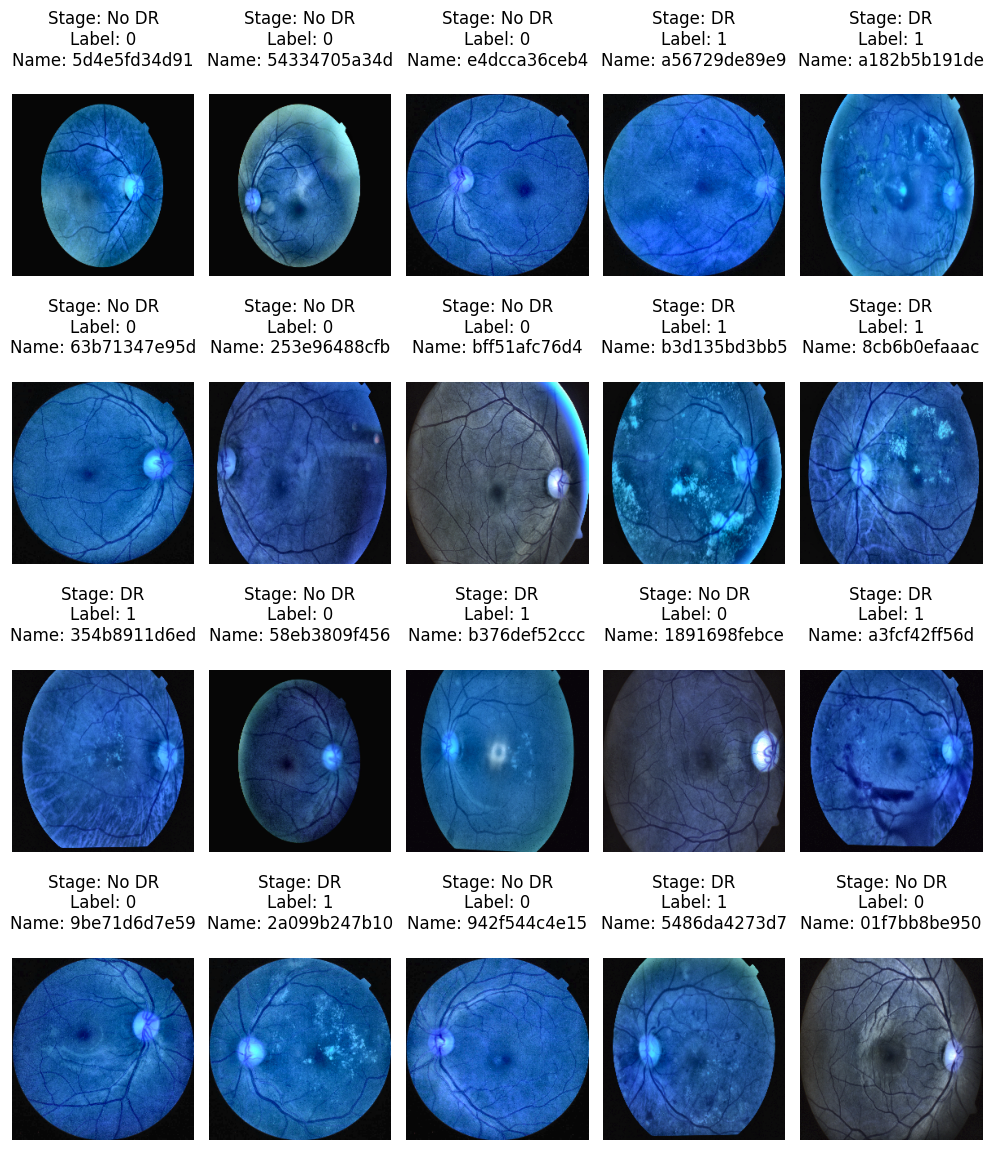

In [ ]:
indices_to_display = random.sample(range(len(TrainImages)), 40)

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 12))

for i, ax in enumerate(axes.flatten()):
    index = indices_to_display[i]
    image = TrainImages[index]
    label = TrainLabels[index]
    filename_without_extension = train_csv.iloc[index]['id_code']

    stage = 'No DR' if label == 0 else 'DR'

    ax.imshow(image, cmap='gray')
    ax.set_title(f'Stage: {stage}\nLabel: {label}\nName: {filename_without_extension}\n')
    ax.axis('off')

plt.tight_layout()
plt.show()


## **Feature Extractor Model**

In [ ]:
model = ResNet50(weights='imagenet', include_top=False)  # Exclude the top classification layers

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### **Define a function to extract features from an image**


In [ ]:
def extract_features(img, models):
    img_batch = tf.expand_dims(img, axis=0)  # Add batch dimension
    preprocessed_img = tf.keras.applications.resnet.preprocess_input(img_batch)
    features = models.predict(preprocessed_img)
    # Apply global average pooling to reduce dimensions (optional)
    features = GlobalAveragePooling2D()(features)
    features = features.numpy()
    return features.flatten()

### **Extract features**


In [ ]:
features = []

for img_path in TrainImages:
    img = extract_features(img_path, model)
    features.append(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


I0000 00:00:1714191087.944583      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

## **Feature Reduction (PCA)**

### **normalization method (e.g., standardization)**


In [ ]:
features_normalized = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

In [ ]:
def apply_pca(features, n_components=None):

  # Create a PCA object
  pca = PCA(n_components=n_components)

  # Fit the PCA model to the features
  pca.fit(features)

  # Transform the features using PCA
  transformed_features = pca.transform(features)

  # Get the explained variance ratio by each component
  explained_variance = pca.explained_variance_ratio_

  return transformed_features, explained_variance


# Apply PCA retaining all components
transformed_features, explained_variance = apply_pca(features_normalized)

# Apply PCA retaining 90% of the explained variance
n_components = np.where(np.cumsum(explained_variance) >= 0.9)[0][0] + 1
transformed_features, explained_variance = apply_pca(features_normalized, n_components)

print("Shape of transformed features:", transformed_features.shape)
print("Explained variance ratio:", explained_variance)

Shape of transformed features: (3662, 483)
Explained variance ratio: [0.11961354 0.08288557 0.04969112 0.0426005  0.03103249 0.02242648
 0.01859534 0.01668833 0.01492859 0.0137871  0.01243197 0.01159423
 0.01112377 0.00908426 0.00815968 0.0078014  0.00715058 0.00668664
 0.00643869 0.00628314 0.00587995 0.00582984 0.00554784 0.0052679
 0.00495438 0.00492676 0.00490529 0.00460254 0.00450482 0.00425519
 0.00410686 0.00406683 0.00397074 0.00377203 0.00367199 0.00357261
 0.00349943 0.00344362 0.00328711 0.00324411 0.00324025 0.00313609
 0.00301785 0.00296927 0.00292442 0.00288195 0.00278773 0.00271519
 0.00260147 0.00257112 0.00249189 0.00247189 0.00241419 0.00239487
 0.00236534 0.00230025 0.00226764 0.00219642 0.00211373 0.00210845
 0.00208945 0.00204721 0.00201412 0.0019977  0.00194982 0.00193785
 0.00188003 0.001876   0.00184437 0.00182821 0.00178073 0.0017471
 0.0017362  0.00167509 0.00166746 0.0016483  0.00164521 0.00163299
 0.00160698 0.00157697 0.00156542 0.00152989 0.00152308 0.0015

### **Save the Extracted Features to a File**


In [ ]:
np.save('ResNet50_features97.npy', transformed_features)

In [ ]:
#Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(transformed_features,TrainLabels, stratify=TrainLabels, test_size=0.2, random_state=2)

# **Model Evaluation**

# **KNN**

In [ ]:
clfKNN= KNeighborsClassifier(n_neighbors=8, metric='minkowski', weights='distance', p=2)
clfKNN.fit(X_train, y_train)
# Evaluate performance on testing set
accuracy = clfKNN.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.956343792633015


Test Accuracy: 0.956
Precision: 0.956
Recall: 0.956
F1 Score: 0.956
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       361
           1       0.96      0.96      0.96       372

    accuracy                           0.96       733
   macro avg       0.96      0.96      0.96       733
weighted avg       0.96      0.96      0.96       733



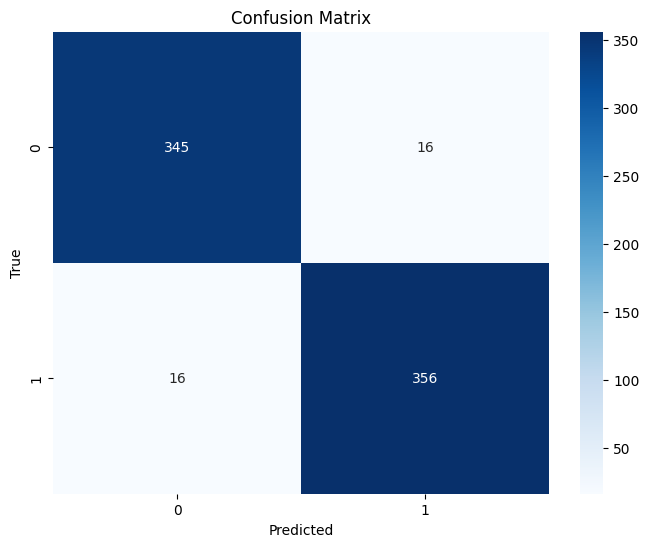

In [ ]:
test_predictions = clfKNN.predict(X_test)

test_pred_labels = test_predictions

test_true_labels = y_test
conf_matrix = confusion_matrix(test_true_labels, test_pred_labels)

accuracy = accuracy_score(test_true_labels, test_pred_labels)
precision = precision_score(test_true_labels, test_pred_labels, average='weighted')
recall = recall_score(test_true_labels, test_pred_labels, average='weighted')
f1 = f1_score(test_true_labels, test_pred_labels, average='weighted')

print(f'Test Accuracy: {accuracy:.3f}\nPrecision: {precision:.3f}\nRecall: {recall:.3f}\nF1 Score: {f1:.3f}')

print(classification_report(test_true_labels, test_pred_labels))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Histogram GB**

In [ ]:
from sklearn import *
clfH=ensemble.HistGradientBoostingClassifier()
clfH.fit(X_train, y_train)
# Evaluate performance on testing set
accuracy = clfH.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.956343792633015


Test Accuracy: 0.956
Precision: 0.957
Recall: 0.956
F1 Score: 0.956
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       361
           1       0.97      0.94      0.96       372

    accuracy                           0.96       733
   macro avg       0.96      0.96      0.96       733
weighted avg       0.96      0.96      0.96       733



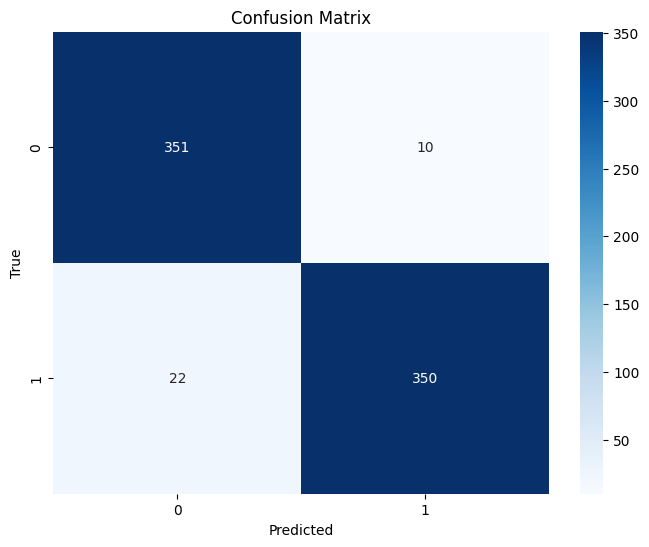

In [ ]:
test_predictions = clfH.predict(X_test)

test_pred_labels = test_predictions

test_true_labels = y_test
conf_matrix = confusion_matrix(test_true_labels, test_pred_labels)

accuracy = accuracy_score(test_true_labels, test_pred_labels)
precision = precision_score(test_true_labels, test_pred_labels, average='weighted')
recall = recall_score(test_true_labels, test_pred_labels, average='weighted')
f1 = f1_score(test_true_labels, test_pred_labels, average='weighted')

print(f'Test Accuracy: {accuracy:.3f}\nPrecision: {precision:.3f}\nRecall: {recall:.3f}\nF1 Score: {f1:.3f}')

print(classification_report(test_true_labels, test_pred_labels))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **SVM**

In [ ]:
# Create and train the SVM quadratic classifier
clfSVM = svm.SVC(kernel='poly', degree=3, gamma='auto')
clfSVM .fit(X_train, y_train)
# Evaluate performance on testing set
accuracy = clfSVM.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9686221009549796


Test Accuracy: 0.969
Precision: 0.969
Recall: 0.969
F1 Score: 0.969
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       361
           1       0.97      0.97      0.97       372

    accuracy                           0.97       733
   macro avg       0.97      0.97      0.97       733
weighted avg       0.97      0.97      0.97       733



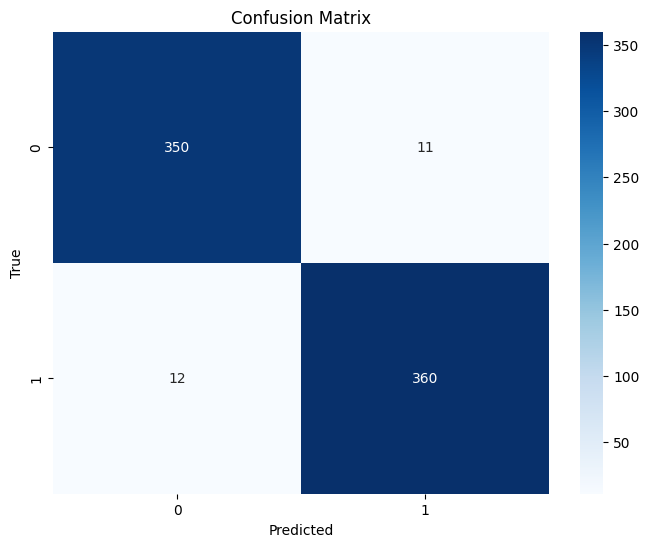

In [ ]:
test_predictions = clfSVM.predict(X_test)

test_pred_labels = test_predictions

test_true_labels = y_test
conf_matrix = confusion_matrix(test_true_labels, test_pred_labels)

accuracy = accuracy_score(test_true_labels, test_pred_labels)
precision = precision_score(test_true_labels, test_pred_labels, average='weighted')
recall = recall_score(test_true_labels, test_pred_labels, average='weighted')
f1 = f1_score(test_true_labels, test_pred_labels, average='weighted')

print(f'Test Accuracy: {accuracy:.3f}\nPrecision: {precision:.3f}\nRecall: {recall:.3f}\nF1 Score: {f1:.3f}')

print(classification_report(test_true_labels, test_pred_labels))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()